In [1]:
import pandas

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Definisanje globalnih promenljivih za lakse menjanje

In [11]:
PUTANJA = 'C:/Users/User/Desktop/AI'
KATEGORIJE = ['ZDRAV', 'VIRUS', 'BAKTERIJA', 'STREPTOCOCCUS', 'COVID-19', 'ARDS', 'SARS']
IMG_SIZE = 400

In [2]:
from tensorflow.keras.callbacks import TensorBoard
import time

IME = "Model-Pluca-9x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(IME))

Pravljenje niza labela "train_y" i punimo ga brojevnim reprezentacijama zadatih kategorija

In [4]:
csv_fajl = pandas.read_csv(PUTANJA + r"\chest_xray_metadata.csv")  # promeniti na svoju lokaciju

# uklanjamo pusace zbog manjka slika (takodje je tako navedeno u zadatku)

train_y = np.ndarray(0)

for index, row in csv_fajl.iterrows():
    if row['Label'] != 'Normal':
        if str(row['Label_2_Virus_category']) != 'nan':
            if row['Label_2_Virus_category'] == 'Streptococcus':
                #csv_fajl.at[str(index), 'Label'] = 3
                train_y = np.append(train_y, 3)
                #row['Label'] = 3
            elif row['Label_2_Virus_category'] == 'COVID-19':
                #csv_fajl.at[str(index), 'Label'] = 4
                train_y = np.append(train_y, 4)
                #row['Label'] = 4
            elif row['Label_2_Virus_category'] == 'ARDS':
                #csv_fajl.at[str(index), 'Label'] = 5
                train_y = np.append(train_y, 5)
                #row['Label'] = 5
            elif row['Label_2_Virus_category'] == 'SARS':
                #csv_fajl.at[str(index), 'Label'] = 6
                train_y = np.append(train_y, 6)
                #row['Label'] = 6
            else:
                print('promaseno ' + row['Label_2_Virus_category'])
            # print(row['Label'], " => " , row['Label_1_Virus_category'], "|", row['Label_2_Virus_category'])#, row['X_ray_image_name'])
        else:
            if row['Label_1_Virus_category'] == 'Virus':
                #csv_fajl.at[str(index), 'Label'] = 1
                train_y = np.append(train_y, 1)
                #row['Label'] = 1
            elif row['Label_1_Virus_category'] == 'bacteria':
                #csv_fajl.at[str(index), 'Label'] = 2
                train_y = np.append(train_y, 2)
                #row['Label'] = 2
            else:
                print('promaseno ' + row['Label_1_Virus_category'])
            # print(row['Label'], " => " , row['Label_1_Virus_category'], "|", row['Label_2_Virus_category'])#, row['X_ray_image_name'])
    else:
        #csv_fajl.at[str(index), 'Label'] = 0
        train_y = np.append(train_y, 0)
        #row['Label'] = 0

In [5]:
csv_fajl.head()
training_data = []

for index, row in csv_fajl.iterrows():
    img_name = row['X_ray_image_name']
    lokacija = PUTANJA + '/snimci/' + str(img_name)
    try:# za slucaj da neka slika ostecena 
        slika = cv2.imread(lokacija, cv2.IMREAD_GRAYSCALE)
        slika = cv2.resize(slika, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
        training_data.append([slika, int(train_y[index])])
    except:
        print("Ostecena slika " + str(img_name))

In [6]:
print(len(training_data))
"""
for index, row in csv_fajl.iterrows():
    img_name = row['X_ray_image_name']
    lokacija = PUTANJA + '/snimci/' + str(img_name)
    try:# za slucaj da neka slika ostecena 
        slika = cv2.imread(lokacija, cv2.IMREAD_GRAYSCALE)
        slika = cv2.resize(slika, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
        print(str(train_y[index]) + " ==> " + str(img_name))
    except:
        print("Ostecena slika " + str(img_name))
"""

5286


'\nfor index, row in csv_fajl.iterrows():\n    img_name = row[\'X_ray_image_name\']\n    lokacija = PUTANJA + \'/snimci/\' + str(img_name)\n    try:# za slucaj da neka slika ostecena \n        slika = cv2.imread(lokacija, cv2.IMREAD_GRAYSCALE)\n        slika = cv2.resize(slika, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)\n        print(str(train_y[index]) + " ==> " + str(img_name))\n    except:\n        print("Ostecena slika " + str(img_name))\n'

In [7]:
import random

random.shuffle(training_data)

In [8]:
X = []
y = []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Kreiranje CNN-a

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
import pickle
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

In [13]:
#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Trenutni META
####################### 
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    # model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
    tf.keras.layers.Flatten(input_shape = X.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7)
])

####### to get the summary of the model
model.summary()

####### configure the model for traning by adding metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
#######################

# Ne radi
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

dense_layers = [0]
layer_sizes = [32]
conv_layers = [1]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-dense---{}-nodes---{}-conv---{}".format(dense_layer, layer_size, conv_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs_test/{}'.format(IME))
            print(NAME)

            model = tf.keras.models.Sequential()
            
            model.add(Conv2D(layer_size, (3, 3), input_shape = X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))
            
            model.add(Flatten())
            
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
            
            
            model.add(Dense(7))

            model.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy']
            )
            model.fit(np.array(X), np.array(y), batch_size=9,  epochs=5, validation_split=0.1, callbacks=[tensorboard])

0-dense---32-nodes---1-conv---1595949597
Epoch 1/5
529/529 [==============================] - 248s 468ms/step - loss: 1.1148 - accuracy: 0.7276 - val_loss: 0.5198 - val_accuracy: 0.7996
Epoch 2/5
117/529 [=====>........................] - ETA: 1:47 - loss: 0.3968 - accuracy: 0.8376

# model.fit(np.array(X), np.array(y), batch_size=9,  epochs=2, validation_split=0.1, callbacks=[tensorboard])

In [ ]:
# model.fit(np.array(X), np.array(y), batch_size=9,  epochs=2, validation_split=0.1, callbacks=[tensorboard])

za 400:
    Epoch 1/10
    529/529 518s 979ms/step - loss: 1.5214e-07 - accuracy: 0.2466 - val_loss: 1.3859e-07 - val_accuracy: 0.3119
    Epoch 2/10
    529/529 507s 958ms/step - loss: 1.5214e-07 - accuracy: 0.2466 - val_loss: 1.3859e-07 - val_accuracy: 0.3119
    
za 350:
    Epoch 1/10
    529/529 394s 745ms/step - loss: 1.4998e-07 - accuracy: 0.2527 - val_loss: 1.5797e-07 - val_accuracy: 0.2212

In [ ]:
''' #conv i dense su zamenjeni
0-conv---32-nodes---1-dense---1595918749
Epoch 1/2
  2/529 [..............................] - ETA: 5:37 - loss: 13.7277 - accuracy: 0.2778WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.579315). Check your callbacks.
529/529 [==============================] - 78s 148ms/step - loss: 1.1279 - accuracy: 0.7305 - val_loss: 0.4849 - val_accuracy: 0.7958
Epoch 2/2
529/529 [==============================] - 77s 145ms/step - loss: 0.3876 - accuracy: 0.8400 - val_loss: 0.5005 - val_accuracy: 0.7788
0-conv---32-nodes---2-dense---1595918911
Epoch 1/2
  2/529 [..............................] - ETA: 6:36 - loss: 2.6182 - accuracy: 0.2222  WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.639454). Check your callbacks.
529/529 [==============================] - 130s 247ms/step - loss: 0.6906 - accuracy: 0.7219 - val_loss: 0.5290 - val_accuracy: 0.7543
Epoch 2/2
529/529 [==============================] - 127s 240ms/step - loss: 0.4883 - accuracy: 0.7965 - val_loss: 0.5098 - val_accuracy: 0.7750
0-conv---32-nodes---3-dense---1595919185
Epoch 1/2
  2/529 [..............................] - ETA: 28:20 - loss: 1.6812 - accuracy: 0.2222 WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (3.884267). Check your callbacks.
  3/529 [..............................] - ETA: 19:36 - loss: 1.8325 - accuracy: 0.2222WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (3.170902). Check your callbacks.
  4/529 [..............................] - ETA: 15:14 - loss: 1.7329 - accuracy: 0.3056WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.585950). Check your callbacks.
529/529 [==============================] - 149s 282ms/step - loss: 0.6922 - accuracy: 0.7072 - val_loss: 0.5050 - val_accuracy: 0.7826
Epoch 2/2
529/529 [==============================] - 138s 262ms/step - loss: 0.4884 - accuracy: 0.7917 - val_loss: 0.4616 - val_accuracy: 0.7996
0-conv---64-nodes---1-dense---1595919881
Epoch 1/2
  2/529 [..............................] - ETA: 15:05 - loss: 1.2220 - accuracy: 0.4444WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.875274). Check your callbacks.
  3/529 [..............................] - ETA: 11:07 - loss: 1.5099 - accuracy: 0.5185WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.977435). Check your callbacks.
  4/529 [..............................] - ETA: 8:57 - loss: 8.1165 - accuracy: 0.4167 WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.489217). Check your callbacks.
529/529 [==============================] - 157s 297ms/step - loss: 1.1844 - accuracy: 0.7244 - val_loss: 0.5493 - val_accuracy: 0.7580
Epoch 2/2
529/529 [==============================] - 154s 292ms/step - loss: 0.3973 - accuracy: 0.8343 - val_loss: 0.5036 - val_accuracy: 0.7902
0-conv---64-nodes---2-dense---1595920347
Epoch 1/2
  2/529 [..............................] - ETA: 12:34 - loss: 2.9759 - accuracy: 0.1667 WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.231208). Check your callbacks.
529/529 [==============================] - 266s 503ms/step - loss: 0.6934 - accuracy: 0.7271 - val_loss: 0.5445 - val_accuracy: 0.7826
Epoch 2/2
529/529 [==============================] - 261s 493ms/step - loss: 0.4769 - accuracy: 0.8001 - val_loss: 0.5115 - val_accuracy: 0.7807
0-conv---64-nodes---3-dense---1595921035
Epoch 1/2
  2/529 [..............................] - ETA: 10:17 - loss: 1.5227 - accuracy: 0.2778WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.054166). Check your callbacks.
529/529 [==============================] - 293s 554ms/step - loss: 0.7026 - accuracy: 0.7042 - val_loss: 0.6996 - val_accuracy: 0.6975
Epoch 2/2
529/529 [==============================] - 281s 532ms/step - loss: 0.5167 - accuracy: 0.7803 - val_loss: 0.4647 - val_accuracy: 0.7921
0-conv---128-nodes---1-dense---1595921841
Epoch 1/2
  2/529 [..............................] - ETA: 16:24 - loss: 8.4130 - accuracy: 0.3333 WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.664864). Check your callbacks.
529/529 [==============================] - 323s 611ms/step - loss: 1.6026 - accuracy: 0.7194 - val_loss: 0.5205 - val_accuracy: 0.7902
Epoch 2/2
529/529 [==============================] - 313s 592ms/step - loss: 0.4310 - accuracy: 0.8226 - val_loss: 0.5366 - val_accuracy: 0.7750
0-conv---128-nodes---2-dense---1595922863
Epoch 1/2
  2/529 [..............................] - ETA: 12:51 - loss: 3.6535 - accuracy: 0.2222WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (1.211521). Check your callbacks.
529/529 [==============================] - 568s 1s/step - loss: 0.7377 - accuracy: 0.7030 - val_loss: 0.5345 - val_accuracy: 0.7694
Epoch 2/2
529/529 [==============================] - 550s 1s/step - loss: 0.4739 - accuracy: 0.8016 - val_loss: 0.5118 - val_accuracy: 0.7694
0-conv---128-nodes---3-dense---1595924202
Epoch 1/2
  2/529 [..............................] - ETA: 31:55 - loss: 2.1914 - accuracy: 0.2778WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (3.035765). Check your callbacks.
  3/529 [..............................] - ETA: 27:51 - loss: 1.8927 - accuracy: 0.2963WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (2.244955). Check your callbacks.
 56/529 [==>...........................] - ETA: 13:38 - loss: 1.0876 - accuracy: 0.5258
 '''

'''
0-coonv---32-nodes---1-dense---1595918749
529/529 [==============================] - 77s 145ms/step - loss: 0.3876 - accuracy: 0.8400 - val_loss: 0.5005 - val_accuracy: 0.7788

0-coonv---32-nodes---2-dense---1595918911
529/529 [==============================] - 127s 240ms/step - loss: 0.4883 - accuracy: 0.7965 - val_loss: 0.5098 - val_accuracy: 0.7750

0-coonv---32-nodes---3-dense---1595919185
529/529 [==============================] - 138s 262ms/step - loss: 0.4884 - accuracy: 0.7917 - val_loss: 0.4616 - val_accuracy: 0.7996

0-coonv---64-nodes---1-dense---1595919881
529/529 [==============================] - 154s 292ms/step - loss: 0.3973 - accuracy: 0.8343 - val_loss: 0.5036 - val_accuracy: 0.7902

0-coonv---64-nodes---2-dense---1595920347
529/529 [==============================] - 261s 493ms/step - loss: 0.4769 - accuracy: 0.8001 - val_loss: 0.5115 - val_accuracy: 0.7807

0-coonv---64-nodes---3-dense---1595921035
529/529 [==============================] - 281s 532ms/step - loss: 0.5167 - accuracy: 0.7803 - val_loss: 0.4647 - val_accuracy: 0.7921

0-coonv---128-nodes---1-dense---1595921841
529/529 [==============================] - 313s 592ms/step - loss: 0.4310 - accuracy: 0.8226 - val_loss: 0.5366 - val_accuracy: 0.7750

0-coonv---128-nodes---2-dense---1595922863
529/529 [==============================] - 550s 1s/step - loss: 0.4739 - accuracy: 0.8016 - val_loss: 0.5118 - val_accuracy: 0.7694

0-coonv---128-nodes---3-dense---1595924202
Epoch 1/2
  2/529 [..............................] - ETA: 31:55 - loss: 2.1914 - accuracy: 0.2778WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (3.035765). Check your callbacks.
  3/529 [..............................] - ETA: 27:51 - loss: 1.8927 - accuracy: 0.2963WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (2.244955). Check your callbacks.
 56/529 [==>...........................] - ETA: 13:38 - loss: 1.0876 - accuracy: 0.5258
'''

## kompjuter se pregrejao i ugasio se, tako da mozda fali nekoliko izmena (osim koda za cuvanje promena). meni izgleda kao da je sve ostalo tu, tako da nastavljam, iako nisam ponovo testirao kod, sa vec sacuvanim modelom sa 94.08% preciznosti

# Koriscenje modela

In [83]:
model = tf.keras.models.load_model('saved_model\\0-dense---32-nodes---1-conv---accuracy-95_08')# kod za ucitavanje modela koji se nalazi u folderu saved_model koji sadrzi folder 0-dense---32-nodes---1-conv---accuracy-95_08

In [7]:
model.summary()# da proverimo da li je model dobro ucitan/sacuvan

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1267232)           0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8870631   
Total params: 8,870,951
Trainable params: 8,870,951
Non-trainable params: 0
_________________________________________________________________


In [103]:
IMG_LOCATION = 'C:/Users/User/Desktop/a.png'

In [ ]:
# nesto nije uredu sa predvidjanjima

Model je 1936.91% siguran da je odgovor SARS


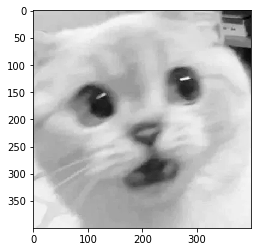

In [105]:
test_slika = cv2.imread(IMG_LOCATION, cv2.IMREAD_GRAYSCALE)
test_slika = cv2.resize(test_slika, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
plt.imshow(test_slika, cmap='gray')

test_slika = np.array(test_slika)
test_slika = (np.expand_dims(test_slika,0))
test_slika = (np.expand_dims(test_slika,-1))

prediction = model.predict(test_slika)
print("Model je {:.2f}% siguran da je odgovor {}".format( round(np.amax(prediction[0]),2), KATEGORIJE[np.argmax(prediction[0])]))